This notebook will explore how optimal entry points might cluster when taking different indicators into account.


In [1]:
import os
os.chdir('../../')
os.getcwd()

&#39;/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing&#39;

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.tree import DecisionTreeClassifier
from v2.model import Trading
from v2.strategy.indicators.smma import SMMA
from v2.strategy.indicators.stochastic_oscillator import StochasticOscillator
from v2.strategy.indicators.bollinger_bands import BollingerBands
from v2.strategy.indicators.macd import MACD
from v2.strategy.indicators.param import Param



In [114]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())

In [115]:
datasets = model.dfs
training_set = datasets[0][0]

training_set['trough'] = training_set.iloc[argrelextrema(training_set.close.values, np.less_equal, order=60)[0]]['close']
training_set['peak'] = training_set.iloc[argrelextrema(training_set.close.values, np.greater_equal, order=60)[0]]['close']


    

As you can see, this identifies minimums and maximums over a specific window (order)

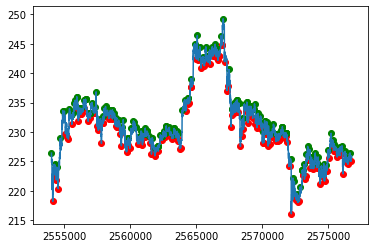

In [101]:
plt.scatter(training_set.index, training_set['trough'], c='r')
plt.scatter(training_set.index, training_set['peak'], c='g')
plt.plot(training_set.index, training_set['close'])
plt.show()

Now let's see if we can train a classifier to identify these points in other datasets using indicators as features.


In [103]:
ema_fast = Param(5, 10000, 0, 'ema_fast', 60)
ema_slow= Param(6, 10001, 0, 'ema_slow', 120)
signal = Param(5, 10001, 0, 'signal', 90)
macd_ = MACD(_params=[ema_fast, ema_slow, signal], _name='macd')
macd_.genData(training_set, gen_new_values=False)
boll_period = Param(5, 10000, 0, 'period', 90)
boll_bands = BollingerBands(_params=[boll_period], _name='bollinger_bands')
boll_bands.genData(training_set, gen_new_values=False)
stoch_highlow = Param(5, 10000, 0, 'highlow_range', 90.0)
stoch_k = Param(5, 10000, 0, 'k_period', 270.0)
stoch_oscillator = StochasticOscillator(_params=[stoch_highlow, stoch_k], _name='stochastic_oscillator')
stoch_oscillator.genData(training_set, gen_new_values=False)
smma_period = Param(5, 10000, 0, 'period', 90.0)
smma_ = SMMA(_params=[smma_period], _name='smma')
smma_.genData(training_set, gen_new_values=False)
training_set['macd_diff'] = training_set['macd'] - training_set['signal']
training_set[['trough', 'peak']] = training_set[['trough', 'peak']].fillna(0)
training_set = training_set.dropna()
training_set

,time,open,high,low,close,volume,trades,trough,peak,ema_slow,...,boll_sma,boll_stdev,boll_upper,boll_lower,stosc_high_price,stosc_low_price,stosc_k,stosc_d,smma,macd_diff
2554733,1592240220,227.64,227.64,227.46,227.46,24.698188,10,0.0,0.0,226.628459,...,227.045222,0.885589,228.816400,225.274044,225.43,229.66,52.009456,35.741906,226.101724,-0.041429
2554734,1592240280,227.55,227.55,227.55,227.55,2.000000,1,0.0,0.0,226.643692,...,227.063778,0.878366,228.820510,225.307045,225.43,229.66,49.881797,35.816726,226.118109,-0.047246
2554735,1592240340,227.50,227.58,227.50,227.57,56.769084,4,0.0,0.0,226.659002,...,227.083444,0.869523,228.822490,225.344399,225.43,229.66,49.408983,35.889795,226.134532,-0.052638
2554736,1592240400,227.86,228.37,227.86,228.37,207.904341,34,0.0,0.0,226.687283,...,227.111333,0.870094,228.851521,225.371146,225.43,229.66,30.496454,35.892817,226.159814,-0.045223
2554737,1592240460,228.33,228.33,228.33,228.33,0.200000,1,0.0,0.0,226.714436,...,227.139111,0.868633,228.876377,225.401846,225.43,229.66,31.442080,35.899342,226.184352,-0.039263
2554738,1592240520,228.34,228.43,228.32,228.32,20.786233,9,0.0,0.0,226.740974,...,227.171222,0.858095,228.887413,225.455031,225.57,229.66,32.762836,35.946274,226.208495,-0.034187
2554739,1592240580,228.32,228.33,228.31,228.31,100.532590,19,0.0,0.0,226.766908,...,227.200111,0.852094,228.904299,225.495923,225.57,229.66,33.007335,35.970434,226.232247,-0.029942
2554740,1592240640,228.31,228.32,228.31,228.32,2.730343,3,0.0,0.0,226.792579,...,227.230667,0.842232,228.915131,225.546203,225.57,229.66,32.762836,35.976777,226.255839,-0.026158
2554741,1592240700,228.31,228.31,228.31,228.31,0.062883,1,0.0,0.0,226.817661,...,227.261111,0.830975,228.923062,225.599160,225.71,229.66,34.177215,35.977058,226.279048,-0.023127
2554742,1592240760,228.32,228.32,228.16,228.16,209.799389,41,0.0,0.0,226.839848,...,227.286778,0.822532,228.931842,225.641713,225.71,229.66,37.974684,35.963689,226.300295,-0.023027


In [104]:
clf = DecisionTreeClassifier(random_state=69420)
input_data = training_set[['close', 'boll_upper', 'boll_lower', 'stosc_k', 'macd_diff', 'smma']]

is_trough = training_set['trough'].gt(0).astype(int)

In [105]:
clf.fit(input_data, is_trough)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion=&#39;gini&#39;,
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=&#39;deprecated&#39;,
                       random_state=69420, splitter=&#39;best&#39;)

In [111]:
model = Trading(load_config())
datasets = model.dfs
test_data = datasets[0][0]


macd_.genData(test_data, gen_new_values=False)

boll_bands.genData(test_data, gen_new_values=False)

stoch_oscillator.genData(test_data, gen_new_values=False)

smma_.genData(test_data, gen_new_values=False)
test_data['macd_diff'] = test_data['macd'] - test_data['signal']
test_data = test_data.dropna()

new_input_data = test_data[['close', 'boll_upper', 'boll_lower', 'stosc_k', 'macd_diff', 'smma']]


test_data['predictions'] = clf.predict(new_input_data)
def insert_predictions(close, prediction):
    if prediction:
        return close
    else:
        return None
test_data['predictions'] = test_data.apply(lambda row: insert_predictions(row['close'], row['predictions']), axis=1)

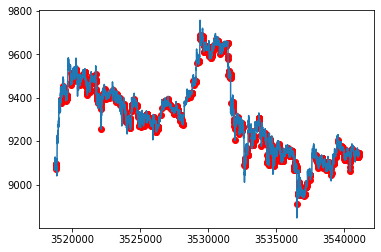

In [112]:
plt.scatter(test_data.index, test_data['predictions'], c='r')
plt.plot(test_data.index, test_data['close'])
plt.show()